## Objectives

The main objectives of this notebook are as following:

* Understanding the sale price distribution and address possible skewness
* Fix missing data
* Address outliers in the target variable and independent variabels
* observe correlations in the data
* Find variables that have multicollinearity

In [519]:
#normal ds libraries
import pandas as pd
import numpy as np
import scipy as sp

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from statistics import mode

In [520]:
train_df = pd.read_csv('data/train.csv')

#drop the ids
train_ids = train_df.Id
train_df.drop(['Id'], axis= 1, inplace=True)

In [521]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Dimensions

In [522]:
train_df.shape

(1460, 80)

We see that after removing the ids, we have 80 columns, including the "SalePrice".

In [523]:
#cat_df = train_df.select_dtypes(include=['object']).copy()
#cat_df.shape

## Response Variable

First thing first, we would like to look the distribution of the sale price. Experience tell us the distribution of house sale price is never normal and always has outliers. Let's take a look.

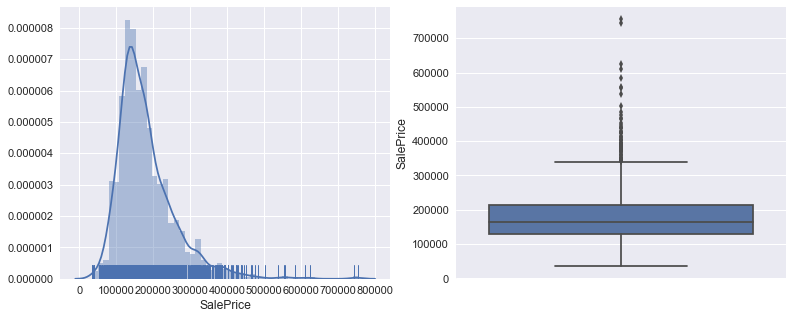

In [524]:
sns.set(font_scale=1.1)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize = (13,5))

sns.distplot(train_df['SalePrice'], ax=ax1, rug = True)
sns.boxplot(train_df['SalePrice'], orient='v', ax=ax2)

We immediately see some embeding problem with the response variable's distribution. The distribution is right-skewed and has outliers. We would need to address these problems.

We would apply logarithmic to the sale price and it should become normal.

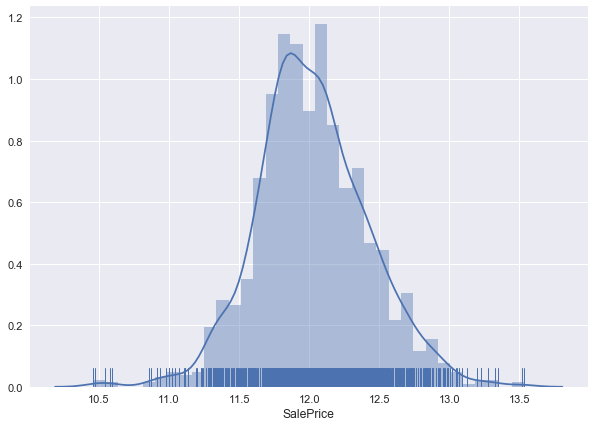

In [528]:
plt.figure(figsize=(10,7))
sns.distplot(np.log(train_df['SalePrice']), rug = True)

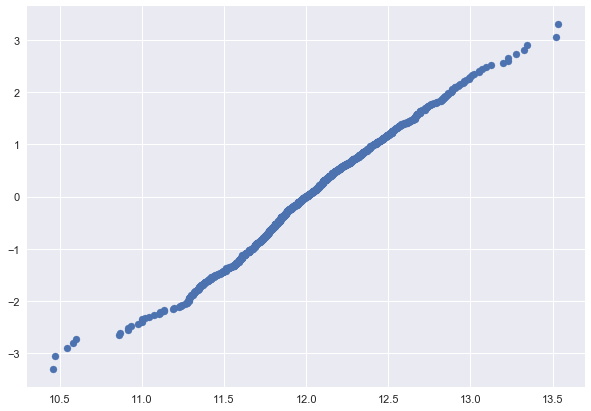

In [530]:
def quantile_plot(x, **kwargs):
    qntls, xr = sp.stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
plt.figure(figsize=(10,7))

quantile_plot(np.log(train_df['SalePrice']))

Despite that we already addressed the normality issues, we see that the the lower left and upper right corners there are outliers. We will need to address these later.

We've already take a close look at our target variable, next, we would like to go through our independent variables. However, there are so many of them, we will need some strategies instead of going through them one by one. 

First, we would seperate the variables into numeric and categorical variables, and in each category of variable we would need to break them down further more to observe correlation with the resposne variable and possible multicollinearity.

## Numerical Variables

In [475]:
num_df = train_df.select_dtypes(exclude=['object'])
num_df.shape

(1399, 37)

In [476]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1459
Data columns (total 37 columns):
MSSubClass       1399 non-null int64
LotFrontage      1143 non-null float64
LotArea          1399 non-null int64
OverallQual      1399 non-null int64
OverallCond      1399 non-null int64
YearBuilt        1399 non-null int64
YearRemodAdd     1399 non-null int64
MasVnrArea       1392 non-null float64
BsmtFinSF1       1399 non-null int64
BsmtFinSF2       1399 non-null int64
BsmtUnfSF        1399 non-null int64
TotalBsmtSF      1399 non-null int64
1stFlrSF         1399 non-null int64
2ndFlrSF         1399 non-null int64
LowQualFinSF     1399 non-null int64
GrLivArea        1399 non-null int64
BsmtFullBath     1399 non-null int64
BsmtHalfBath     1399 non-null int64
FullBath         1399 non-null int64
HalfBath         1399 non-null int64
BedroomAbvGr     1399 non-null int64
KitchenAbvGr     1399 non-null int64
TotRmsAbvGrd     1399 non-null int64
Fireplaces       1399 non-null int64
G

#### MSSubClass

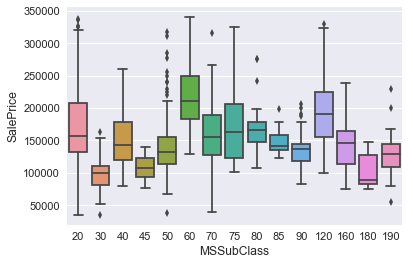

In [477]:
sns.boxplot(x = 'MSSubClass', y ='SalePrice', data = train_df)

This should not be considered as a numeric variable.

In [478]:
train_df['MSSubClass'] = train_df['MSSubClass'].astype('object')

In [479]:
num_df.drop(['MSSubClass'], axis=1, inplace=True)

C:\Users\Xi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Correlation

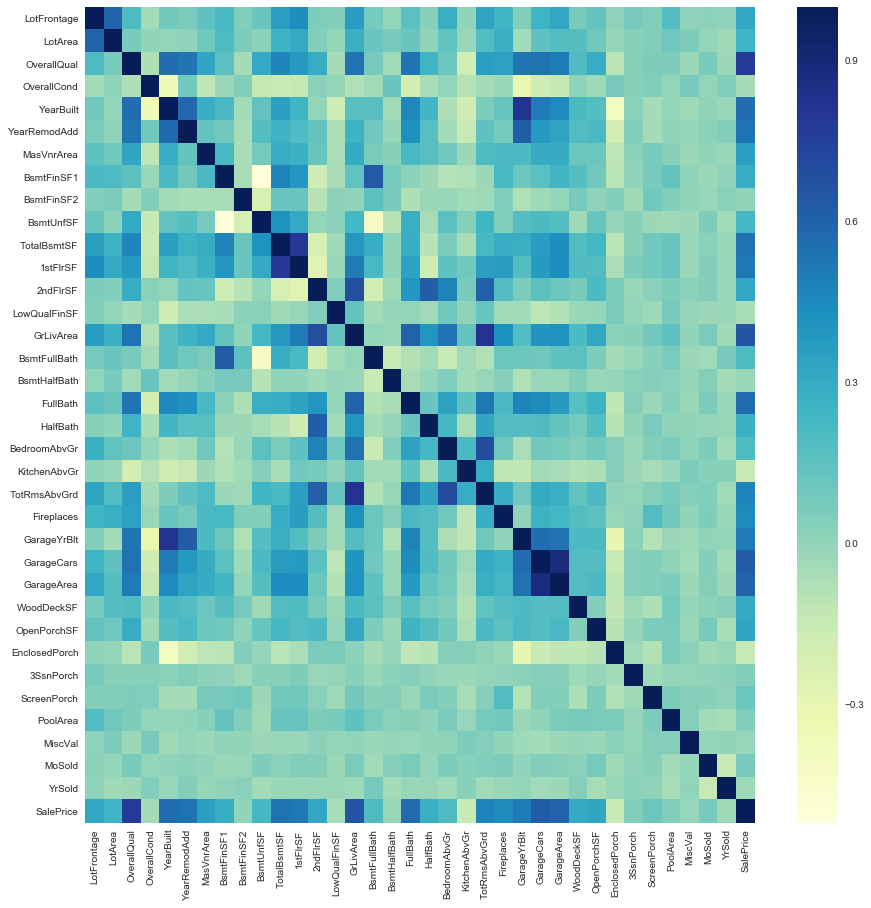

In [480]:
plt.figure(figsize=(15,15))
sns.set_context("notebook", font_scale=1)
sns.heatmap(num_df.corr(),cmap = "YlGnBu")

In [481]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1459
Data columns (total 36 columns):
LotFrontage      1143 non-null float64
LotArea          1399 non-null int64
OverallQual      1399 non-null int64
OverallCond      1399 non-null int64
YearBuilt        1399 non-null int64
YearRemodAdd     1399 non-null int64
MasVnrArea       1392 non-null float64
BsmtFinSF1       1399 non-null int64
BsmtFinSF2       1399 non-null int64
BsmtUnfSF        1399 non-null int64
TotalBsmtSF      1399 non-null int64
1stFlrSF         1399 non-null int64
2ndFlrSF         1399 non-null int64
LowQualFinSF     1399 non-null int64
GrLivArea        1399 non-null int64
BsmtFullBath     1399 non-null int64
BsmtHalfBath     1399 non-null int64
FullBath         1399 non-null int64
HalfBath         1399 non-null int64
BedroomAbvGr     1399 non-null int64
KitchenAbvGr     1399 non-null int64
TotRmsAbvGrd     1399 non-null int64
Fireplaces       1399 non-null int64
GarageYrBlt      1318 non-null float64

In [482]:
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'SalePrice']

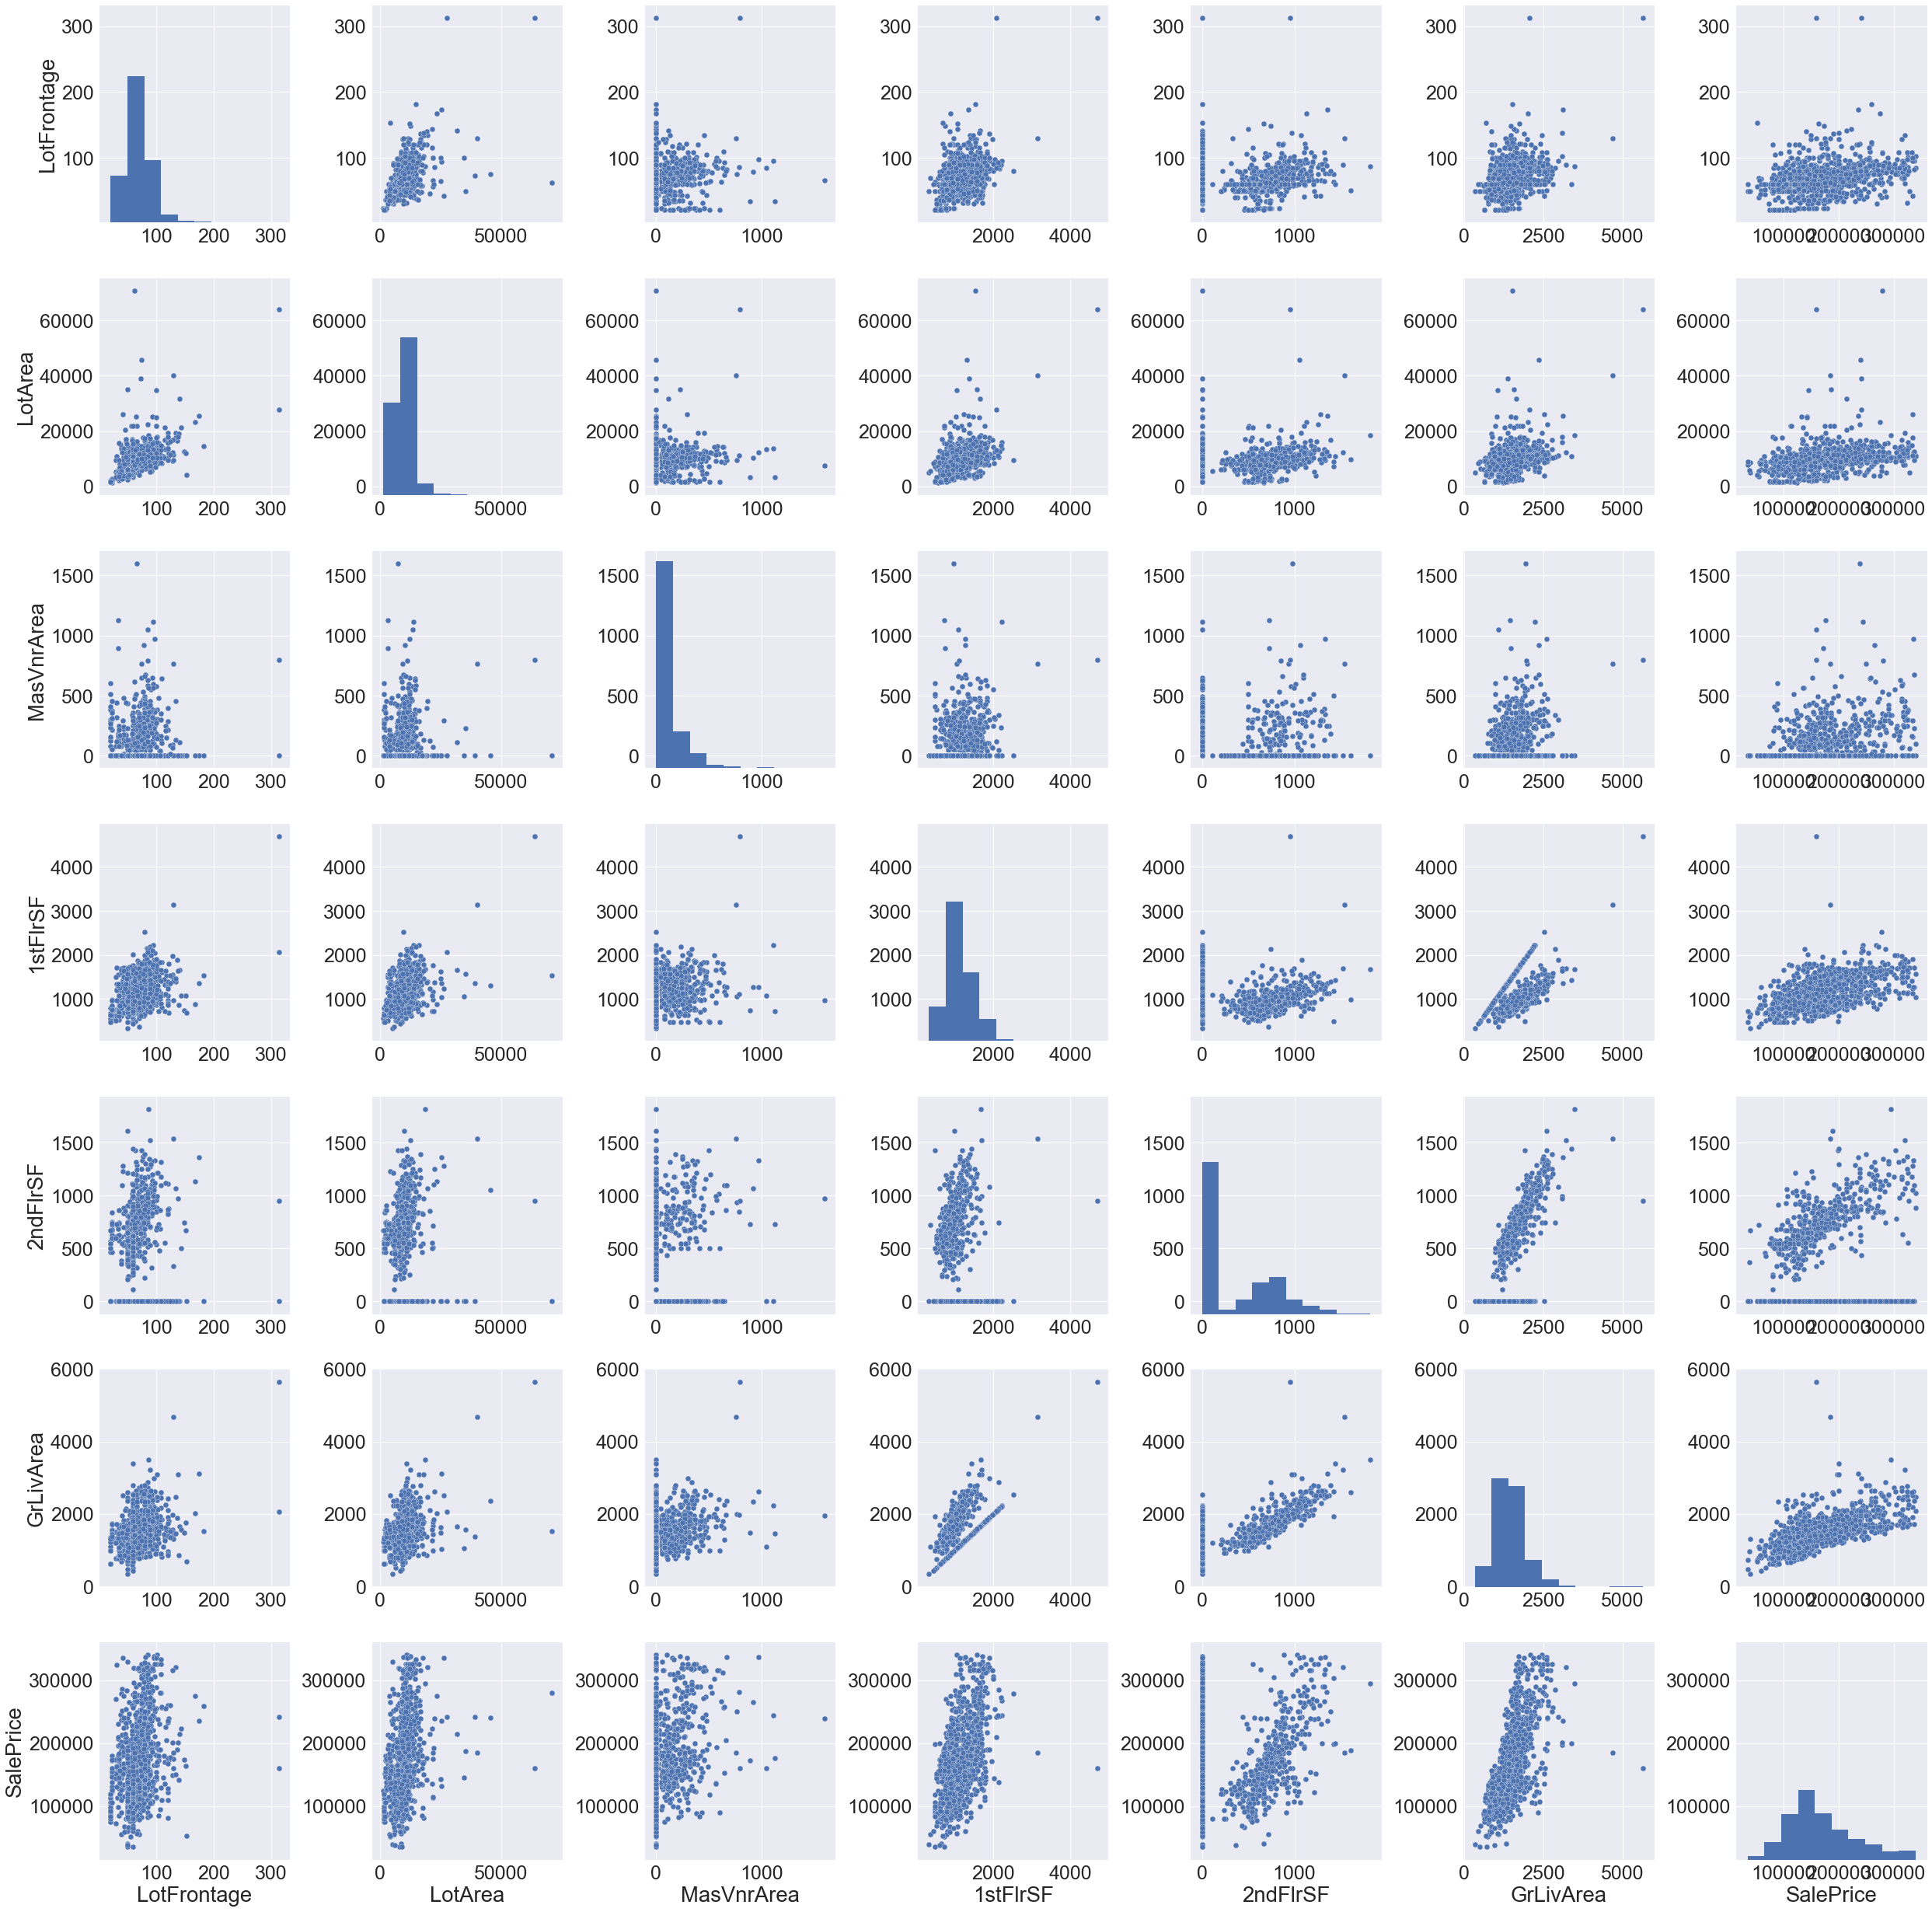

In [483]:
sns.set_context("notebook", font_scale=2.5)
sns.pairplot(num_df[area_cols].dropna(), size=5)

Looking at the scatter plot, we can spot there are multiple variables that cotain outliers.

In [487]:
num_df_tmp = num_df[num_df['LotFrontage'] < 300] 
num_df_tmp = num_df_tmp[num_df_tmp['LotArea'] < 50000] 
num_df_tmp = num_df_tmp[num_df_tmp['MasVnrArea'] < 1500] 
num_df_tmp = num_df_tmp[num_df_tmp['1stFlrSF'] < 4000]
num_df_tmp = num_df_tmp[num_df_tmp['GrLivArea'] < 5000]

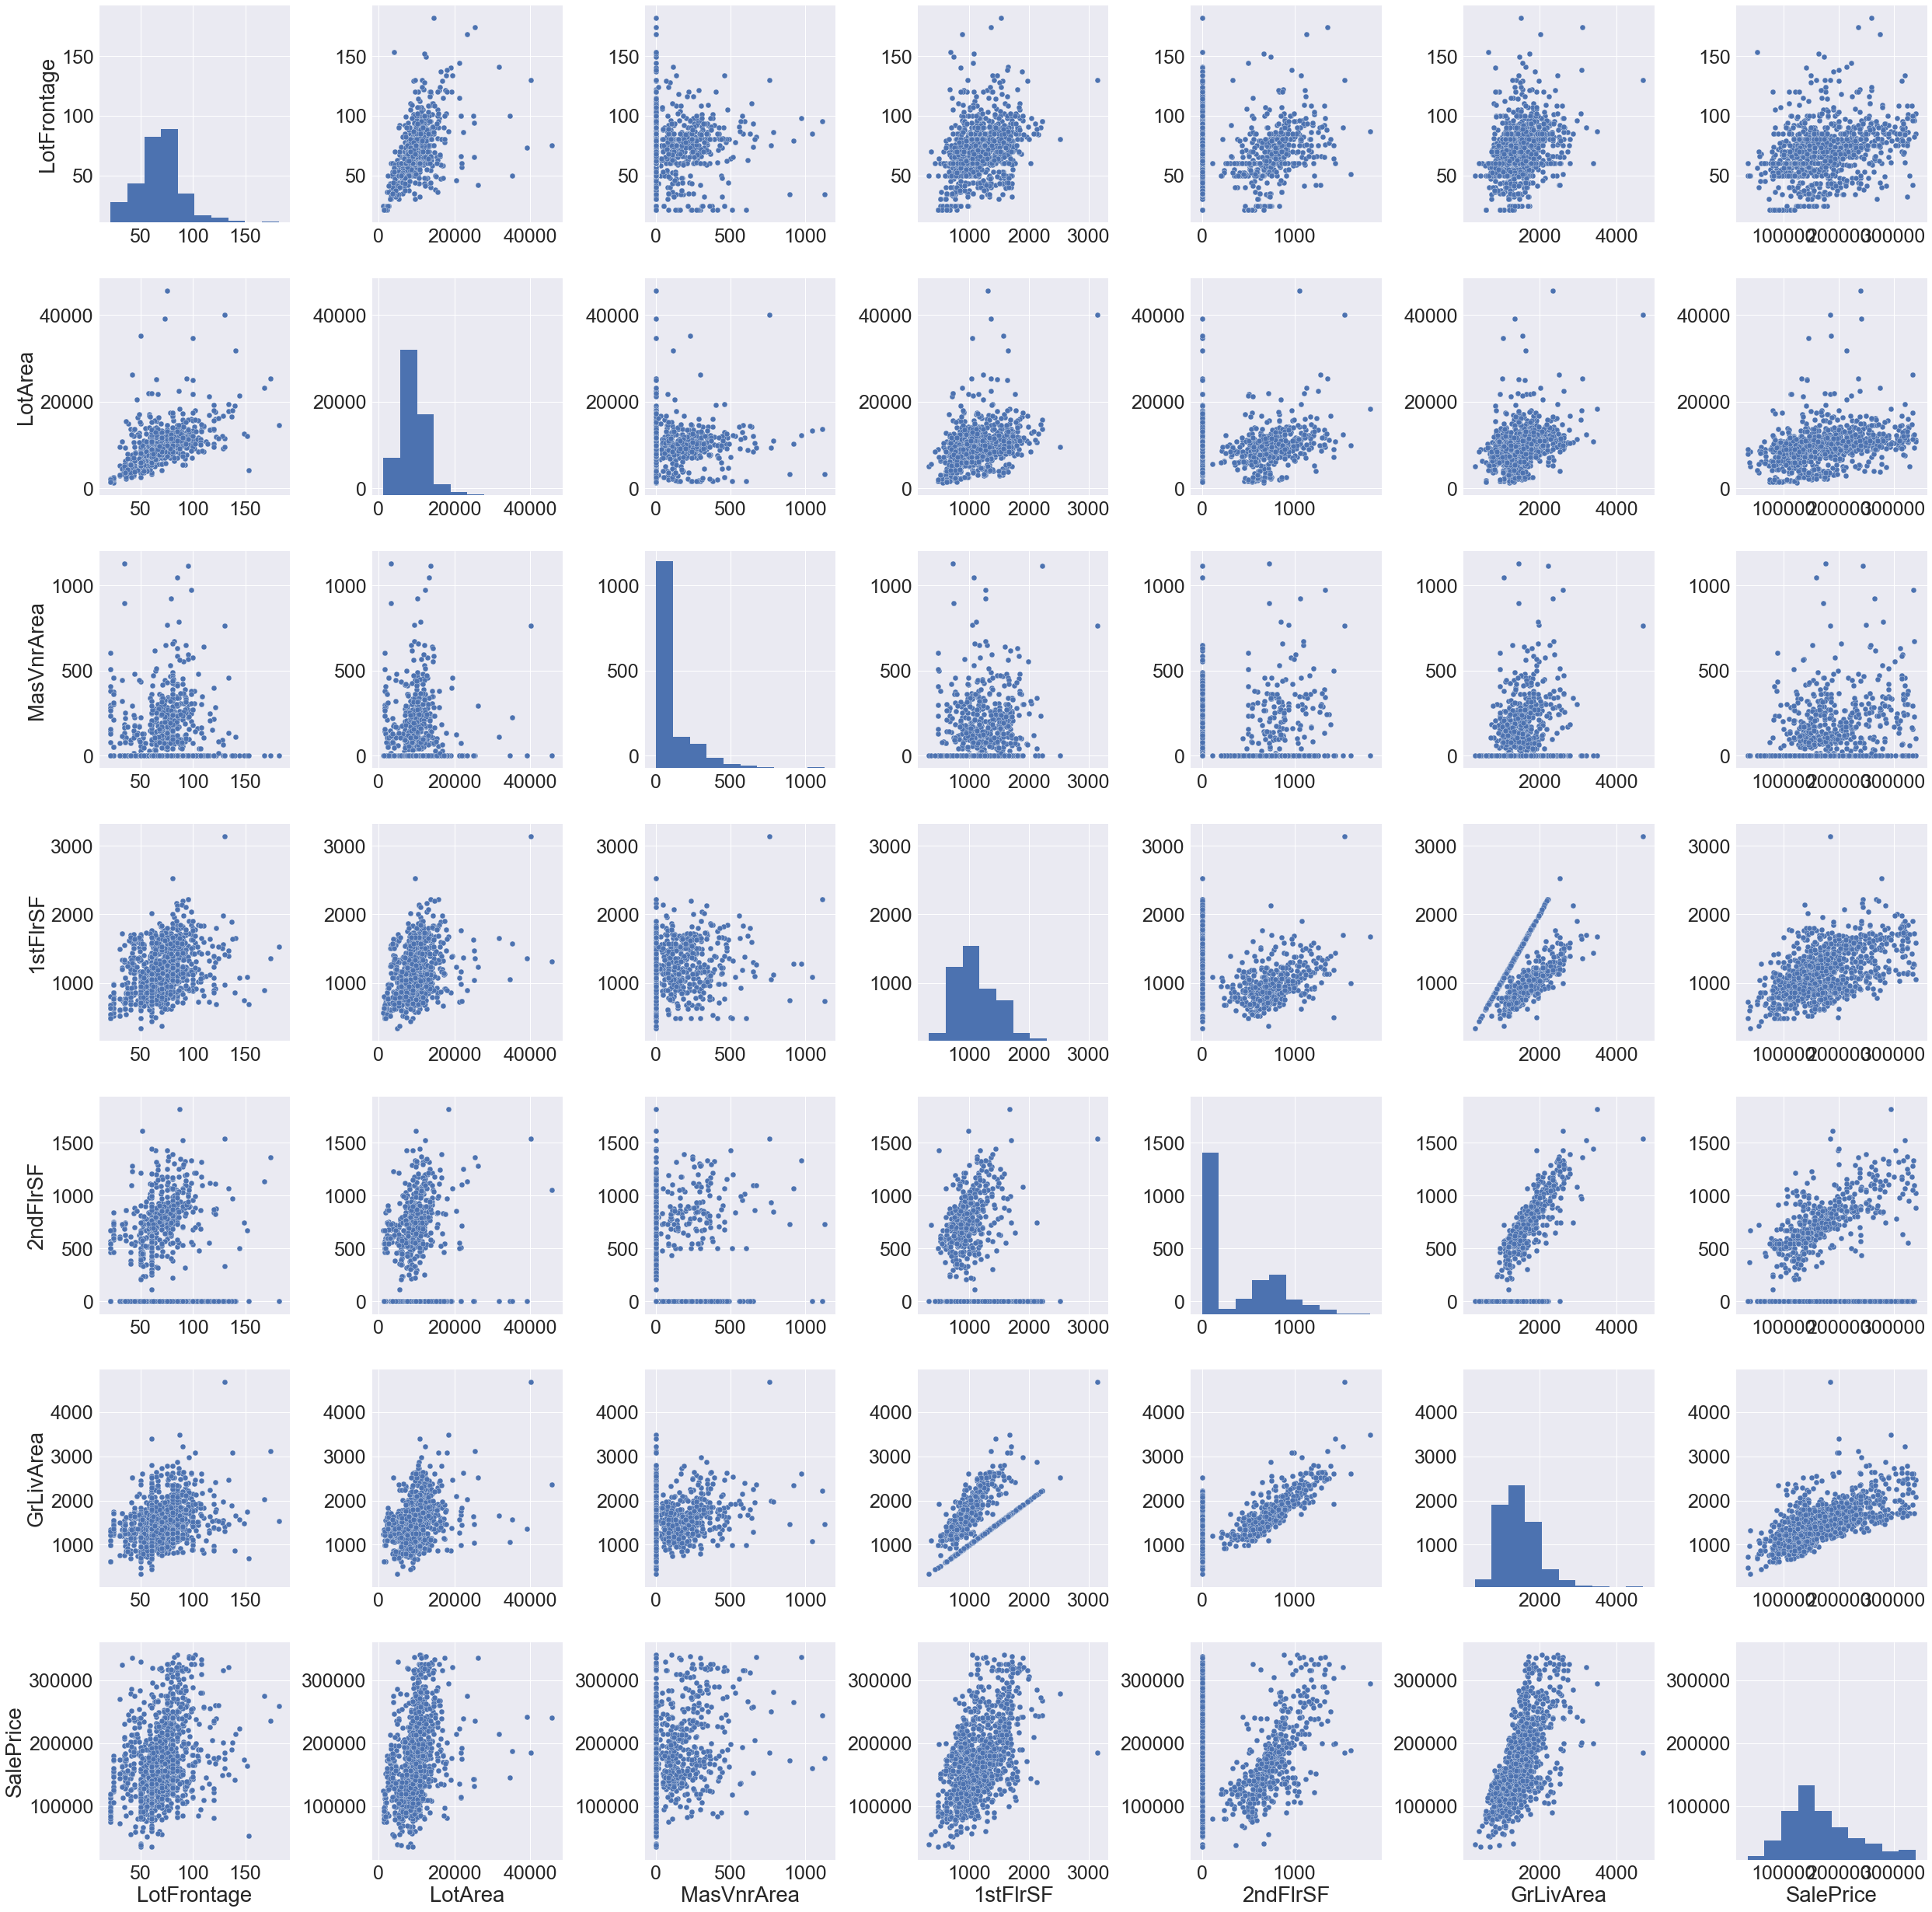

In [488]:
sns.set_context("notebook", font_scale=2.5)
sns.pairplot(num_df_tmp[area_cols].dropna(), size=5)

# Conclusion
* Set outlier boundairies for response variable
* "MSSubClass" should not be considered as numeric value
* remove outliers for "LotFrontage"